# **Import Utilities**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir('/content/gdrive/My Drive/DS532_Text_Analytic/Project_Hospital')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
comments = pd.read_csv("comment_praram-9-hospital.csv")

In [0]:
from tqdm import tqdm_notebook

In [0]:
rama = pd.read_csv("comment_praram-9-hospital.csv")
rama = rama.reset_index()
rama = rama.rename(columns={"index": "cid"})

# **Sentence Tokenize**

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
from nltk import sent_tokenize

sentences = []
cids = []
for cid in rama["cid"]:
    s = sent_tokenize(rama.loc[cid, "en"])
    sentences = sentences + s
    cids = cids + [cid] * len(s)

# **Sentence-level sentiment**

In [7]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [8]:
!pip install twython

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [0]:
def predict_sentiment(sentence):
  sa = SentimentIntensityAnalyzer()
  sentiment_distribution = sa.polarity_scores(sentence)
  score = sentiment_distribution.get("compound")
  
  if score >= 0.05:
    return "positive"
  elif score <= -0.05:
    return "negative"
  else:
    return "neutral"

In [11]:
sentiments = []
for sentence in tqdm_notebook(sentences, total=len(sentences)):
    sentiments.append(predict_sentiment(sentence))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


## **Parsing**

In [12]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
from nltk import word_tokenize, pos_tag, RegexpParser

In [0]:
grammar = """NP: {<NN|NNS>+}
                 {<NN|NNS>+<CC><NN|NNS>+}"""
chunker = RegexpParser(grammar)
parse_trees = []
for sentence in sentences:
    parse_trees.append(chunker.parse(pos_tag(word_tokenize(sentence))))

In [15]:
parse_trees

[Tree('S', [('Get', 'VB'), ('a', 'DT'), Tree('NP', [('knee', 'NN'), ('replacement', 'NN')]), ('by', 'IN'), ('the', 'DT'), Tree('NP', [('doctor', 'NN')]), ('Nattawut', 'NNP'), Tree('NP', [('side', 'NN')]), ('.', '.')]),
 Tree('S', [('You', 'PRP'), ('made', 'VBD'), ('very', 'RB'), ('good', 'JJ'), ('But', 'CC'), ('I', 'PRP'), ('have', 'VBP'), Tree('NP', [('trouble', 'NN')]), ('traveling', 'VBG'), ('abroad', 'RB'), ('often', 'RB'), ('do', 'VBP'), ('not', 'RB'), ('realize', 'VB'), ('that', 'IN'), ('the', 'DT'), Tree('NP', [('hospital', 'NN')]), ('when', 'WRB'), ('the', 'DT'), Tree('NP', [('surgery', 'NN')]), (',', ','), ('organ', 'JJ'), Tree('NP', [('customers', 'NNS')]), ('already', 'RB'), ('have', 'VBP'), ('a', 'DT'), Tree('NP', [('card', 'NN')]), ('about', 'IN'), ('the', 'DT'), Tree('NP', [('surgery', 'NN')]), ('that', 'IN'), Tree('NP', [('customers', 'NNS')]), ('carry', 'VBP'), ('a', 'DT'), Tree('NP', [('card', 'NN')]), ('or', 'CC'), Tree('NP', [('cards', 'NNS')]), ('Blood', 'NNP'), ('G

# **Extract Noun Phrase**

In [0]:
def extract_np(parsed_tree):
    nps = []
    for subtree in parsed_tree.subtrees():
        if subtree.label() == 'NP':
            t = subtree
            t = " ".join(word for word, tag in t.leaves())
            nps.append(t)
    return nps

In [0]:
nps = []
for parse_tree in parse_trees:
    nps.append(extract_np(parse_tree))

In [18]:
nps

[['knee replacement', 'doctor', 'side'],
 ['trouble',
  'hospital',
  'surgery',
  'customers',
  'card',
  'surgery',
  'customers',
  'card',
  'cards'],
 ['time'],
 ['consideration'],
 ['service', 'nursing care', 'support'],
 ['key', 'doctor', 'cost', 'bathroom'],
 ['drug', 'quality'],
 ['stomach', 'pain', 'track', 'appointment', 'drug'],
 ['Truth', 'fast', 'convenient'],
 ['doctors', 'bloating', 'lifting'],
 ['level'],
 ['baby'],
 ['System', 'standard'],
 ['staff'],
 ['nice'],
 ['staff', 'angel'],
 ['check', 'year', 'hospital', 'interests', 'patients', 'hospital'],
 ['relations', 'inter', 'languages', 'doctor', 'people'],
 [],
 ['one'],
 ['service', 'staff', 'treatment'],
 ['service', 'expert', 'place', 'clean', 'services'],
 ['place', 'queues'],
 ['services', 'hospital'],
 ['time', 'time'],
 ['hospital food'],
 ['cheek swollen',
  'hand',
  'pain',
  'records',
  'doctor',
  'surgery',
  'doctors',
  'painkillers',
  'antibiotics',
  'home',
  'pain'],
 ['cheek',
  'doctor',
  'ne

## **Put information into DataFrame**

In [0]:
df = pd.DataFrame({"cids": cids, 
                   "sentences": sentences, 
                   "sentiments": sentiments, 
                   "NP": nps})

In [20]:
df.head(10)

,cids,sentences,sentiments,NP
0,0,Get a knee replacement by the doctor Nattawut ...,neutral,"[knee replacement, doctor, side]"
1,0,You made very good But I have trouble travelin...,positive,"[trouble, hospital, surgery, customers, card, ..."
2,0,foreign it would not have to ask for the time ...,neutral,[time]
3,0,Take into consideration interfering with it.,neutral,[consideration]
4,1,"Very good service, good nursing care flatterin...",positive,"[service, nursing care, support]"
5,1,The key is not to wait And the doctor advised ...,positive,"[key, doctor, cost, bathroom]"
6,1,I've been sick suddenly Was treated immediatel...,negative,"[drug, quality]"
7,1,I always treat stomach Severe abdominal pain Y...,positive,"[stomach, pain, track, appointment, drug]"
8,2,"Truth to Rama 9, as well as fast, convenient, ...",positive,"[Truth, fast, convenient]"
9,2,"But the doctors told us last bloating, heavy l...",neutral,"[doctors, bloating, lifting]"


## **Split dataframe into positive and negative sentiment**

In [0]:
pos = df[df["sentiments"] == "positive"].reset_index(drop=True)
pos_words = sum(pos["NP"].tolist(), [])
pos_words = [word.lower() for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

In [0]:
neg = df[df["sentiments"] == "negative"].reset_index(drop=True)
neg_words = sum(neg["NP"].tolist(), [])
neg_words = [word.lower() for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

## **Word Cloud Representation**

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [0]:
def vizwordcloud(df):
    tuples = [tuple(x) for x in df.values]
    wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

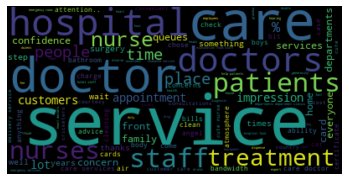

In [25]:
vizwordcloud(poshist)

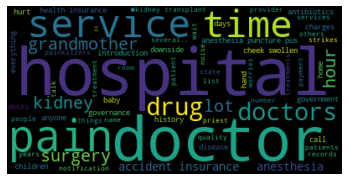

In [26]:
vizwordcloud(neghist)

We saw 2 problems: 1) Singular and plural words were not combined and 2) words that should not be appeared in the wordcloud such as patients because of the co-reference resolution problem.

Let's transfrom selected words to their singular form because at this stage the number of words is not much already then add categories to filter out.

In [0]:
def plural2singular(word):
  if word == "doctors":
    return "doctor"
  elif word == "nurses":
    return "nurse"
  elif word == "clinics":
    return "clinic"
  elif word == "hospitals":
    return "hospital"
  elif word == "services":
    return "service"
  elif word == "staffs":
    return "staff"
  elif word == "treatments":
    return "treatment"
  elif word == "students":
    return "student"
  else:
    return word

In [0]:
pos_words = [plural2singular(word) for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

neg_words = [plural2singular(word) for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

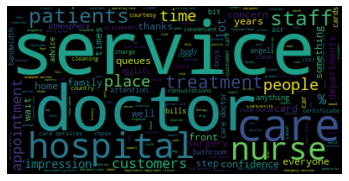

In [29]:
vizwordcloud(poshist)

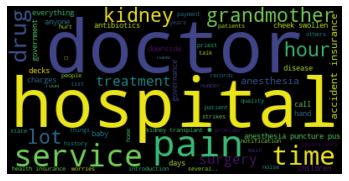

In [30]:
vizwordcloud(neghist)

In [0]:
def groups(word):
    if word in ("doctor", "nurse", "student"):
        return "staff"
    elif word in ("hospital", "clinic", "equipment", "place"):
        return "infrastructure"
    elif word in ("service", "care", "treatment", "surgery", "disease", "medical care"):
        return "service"
    elif word in ("queue", "appointment"):
        return "process"
    elif word in ("price", "claim"):
        return "finance"
    else:
        return "others"

In [0]:
poshist["category"] = poshist["words"].apply(lambda x: groups(x))
poscount = poshist.groupby("category").size().reset_index(name="#")
poscount = poscount[poscount["category"] != "others"].reset_index(drop=True)

In [0]:
neghist["category"] = neghist["words"].apply(lambda x: groups(x))
negcount = neghist.groupby("category").size().reset_index(name="#")
negcount = negcount[negcount["category"] != "others"].reset_index(drop=True)

## **Plot Radar Chart**

In [34]:
poscount

,category,#
0,infrastructure,3
1,process,1
2,service,4
3,staff,2


In [0]:
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode,  plot

In [36]:
fig = px.line_polar(poscount, r="#", theta="category", line_close=True)
plot(fig)

'temp-plot.html'

In [37]:
fig = px.line_polar(negcount, r="#", theta="category", line_close=True)
plot(fig)

'temp-plot.html'